In [484]:
#Using pandas for loading the csv file into a dataframe
import pandas as pd

#Using matplotlib library for basic graph plotting
import matplotlib.pyplot as plt

#Using seaborn library that allows us to optimize matplotlib's output
import seaborn as sns

##Using numpy library
import numpy as np

In [485]:
#Loading the csv file into the pandas dataframe
loan = pd.read_csv('application_train.csv')
loan

,SK_ID_CURR,Unnamed: 1,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,100002,NaN,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,NaN,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,2.0,0,0,0,0,0,0,School,0
2,100004,NaN,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Laborers,1.0,0,0,0,0,0,0,Government,0
3,100006,NaN,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,100007,NaN,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Core staff,1.0,0,0,0,0,1,1,Religion,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,NaN,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Sales staff,1.0,0,0,0,0,0,0,Services,0
307507,456252,NaN,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,1.0,0,0,0,0,0,0,XNA,0
307508,456253,NaN,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Managers,1.0,0,0,0,0,1,1,School,0
307509,456254,NaN,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1


In [486]:
#A check for nulls
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   Unnamed: 1                   0 non-null       float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [487]:
#Dropping the columns with many nulls
loan.drop(['OWN_CAR_AGE','OCCUPATION_TYPE', 'Unnamed: 1'], axis=1, inplace=True)

In [488]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [489]:
#Filling the nulls in the median value
med = loan['AMT_ANNUITY'].median()

In [490]:
loan['AMT_ANNUITY'].fillna(med, inplace=True)

In [491]:
loan['AMT_GOODS_PRICE'].median()

450000.0

In [492]:
loan['AMT_GOODS_PRICE'].fillna(loan['AMT_GOODS_PRICE'].median(), inplace=True)

In [493]:
loan['CNT_FAM_MEMBERS'].median()

2.0

In [494]:
loan['CNT_FAM_MEMBERS'].fillna(loan['CNT_FAM_MEMBERS'].median(), inplace=True)

In [495]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [496]:
#checking the most common value of "NAME_TYPE_SUITE"
loan[loan.columns[10]].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [497]:
#Filling the null with the value "Unaccompanied"
loan.NAME_TYPE_SUITE = loan.NAME_TYPE_SUITE.fillna('Unaccompanied')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  NAME_TYPE_SUITE              307511 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [498]:
#find Inter Quartile Range (IQR)
#find the middle of the range between quantile 1 and quantile 3
Q1 = loan.quantile(0.25)
Q3 = loan.quantile(0.75)
#subtract Q3 from Q1 - this will give the desired range of data 
IQR = Q3 - Q1
#here are the ranges for the entire table
print(IQR)

SK_ID_CURR                     177997.0
CNT_CHILDREN                        1.0
AMT_INCOME_TOTAL                90000.0
AMT_CREDIT                     538650.0
AMT_ANNUITY                     18072.0
AMT_GOODS_PRICE                441000.0
DAYS_BIRTH                       7269.0
DAYS_EMPLOYED                    2471.0
DAYS_REGISTRATION                5469.5
DAYS_ID_PUBLISH                  2579.0
FLAG_MOBIL                          0.0
FLAG_EMP_PHONE                      0.0
FLAG_WORK_PHONE                     0.0
FLAG_CONT_MOBILE                    0.0
FLAG_PHONE                          1.0
FLAG_EMAIL                          0.0
CNT_FAM_MEMBERS                     1.0
REG_REGION_NOT_LIVE_REGION          0.0
REG_REGION_NOT_WORK_REGION          0.0
LIVE_REGION_NOT_WORK_REGION         0.0
REG_CITY_NOT_LIVE_CITY              0.0
REG_CITY_NOT_WORK_CITY              0.0
LIVE_CITY_NOT_WORK_CITY             0.0
TARGET                              0.0
dtype: float64


In [499]:
#Removing an outlier 'AMT_CREDIT'
IQRage =  Q3['AMT_CREDIT'] - Q1['AMT_CREDIT']

In [500]:
below = Q3['AMT_CREDIT'] - 1.5 * IQRage

In [501]:
above = Q3['AMT_CREDIT'] + 1.5 * IQRage

In [502]:
loan.loc[(loan['AMT_CREDIT'] < below)  | (loan['AMT_CREDIT'] > above)] 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
60,100071,Cash loans,F,N,Y,0,180000.0,1663987.5,86989.5,1588500.0,...,0,2.0,0,0,0,0,0,0,Industry: type 11,0
135,100157,Cash loans,M,N,Y,0,180000.0,1755000.0,61132.5,1755000.0,...,0,2.0,0,0,0,0,0,0,Business Entity Type 3,0
189,100219,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,...,1,3.0,0,0,0,0,0,0,Business Entity Type 3,0
235,100273,Cash loans,F,N,Y,0,157500.0,1710000.0,66262.5,1710000.0,...,0,2.0,0,0,0,0,0,0,Other,1
314,100361,Cash loans,M,N,Y,0,270000.0,1800000.0,62698.5,1800000.0,...,0,2.0,0,0,0,0,0,0,Trade: type 7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307216,455924,Cash loans,F,Y,Y,0,225000.0,1827549.0,50386.5,1525500.0,...,0,2.0,0,0,0,0,0,0,XNA,0
307252,455969,Cash loans,M,Y,N,0,292500.0,1724220.0,50544.0,1350000.0,...,0,2.0,0,0,0,0,0,0,Trade: type 7,0
307401,456134,Cash loans,F,Y,Y,0,135000.0,1718473.5,47385.0,1345500.0,...,0,2.0,0,0,0,0,0,0,XNA,0
307422,456155,Cash loans,F,N,Y,0,202500.0,1971072.0,68643.0,1800000.0,...,0,2.0,0,0,0,0,0,0,XNA,0


In [503]:
#Removing an outlier 'AMT_INCOME_TOTAL'
IQRage =  Q3['AMT_INCOME_TOTAL'] - Q1['AMT_INCOME_TOTAL']

In [504]:
below = Q3['AMT_INCOME_TOTAL'] - 1.5 * IQRage

In [505]:
above = Q3['AMT_INCOME_TOTAL'] + 1.5 * IQRage

In [506]:
loan.loc[(loan['AMT_INCOME_TOTAL'] < below)  | (loan['AMT_INCOME_TOTAL'] > above)] 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
7,100010,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,...,0,2.0,0,0,0,0,1,1,Other,0
11,100015,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,...,0,2.0,0,0,0,0,0,0,XNA,0
22,100026,Cash loans,F,N,N,1,450000.000,497520.0,32521.5,450000.0,...,0,3.0,0,0,0,0,0,0,Self-employed,0
33,100039,Cash loans,M,Y,N,1,360000.000,733315.5,39069.0,679500.0,...,0,3.0,0,0,0,1,1,0,Self-employed,0
49,100056,Cash loans,M,Y,Y,0,360000.000,1506816.0,49927.5,1350000.0,...,0,2.0,0,0,0,0,1,1,Transport: type 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307464,456204,Cash loans,F,N,Y,0,58500.000,528633.0,27121.5,472500.0,...,0,2.0,0,0,0,0,0,0,Kindergarten,0
307477,456217,Cash loans,F,N,Y,0,360000.000,796396.5,38443.5,643500.0,...,0,2.0,0,0,0,0,0,0,Medicine,0
307484,456228,Cash loans,F,Y,N,0,540000.000,545040.0,35617.5,450000.0,...,1,2.0,0,0,0,0,0,0,Business Entity Type 3,0
307492,456236,Cash loans,M,Y,Y,0,585000.000,1575000.0,43443.0,1575000.0,...,0,2.0,0,0,0,0,0,0,Self-employed,0


In [507]:
#Creating a new dataframe
loan_no_outlier = loan.loc[(loan['AMT_CREDIT'] >= below) & (loan['AMT_CREDIT'] <= above)] 

In [508]:
loan.shape, loan_no_outlier.shape

((307511, 34), (101936, 34))

In [509]:
loan_no_outlier2 = loan_no_outlier.loc[(loan_no_outlier['AMT_INCOME_TOTAL'] >= below) & (loan_no_outlier['AMT_INCOME_TOTAL'] <= above)] 

In [510]:
loan_no_outlier.shape, loan_no_outlier2.shape

((101936, 34), (94048, 34))

In [511]:
#How much (total) do they have out in loans
Total_amount_loans = loan_no_outlier2['AMT_ANNUITY'].sum()
Total_amount_loans

1440952911.0

In [512]:
#How much are in late
late_loans = loan_no_outlier2.loc[loan_no_outlier2['TARGET']> 0]
late_loans = late_loans.groupby(["TARGET"], as_index=False)["AMT_ANNUITY"].sum()
late_loans

,TARGET,AMT_ANNUITY
0,1,115880350.5


In [513]:
#Finding the percentage of the business that are default and late
loan_no_outlier2['TARGET'].value_counts(normalize=True) * 100

0    92.125298
1     7.874702
Name: TARGET, dtype: float64

In [514]:
#Three more demographics
#Converting the age column from days to years
loan_no_outlier2['age_in_years'] = -loan_no_outlier2['DAYS_BIRTH']/365
loan_no_outlier2

C:\Users\yaelr\AppData\Local\Temp/ipykernel_9388/754758415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_no_outlier2['age_in_years'] = -loan_no_outlier2['DAYS_BIRTH']/365


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,age_in_years
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,1.0,0,0,0,0,0,0,Government,0,52.180822
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2.0,0,0,0,0,0,0,Business Entity Type 3,0,52.068493
12,100016,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,...,2.0,0,0,0,0,0,0,Business Entity Type 2,0,36.819178
15,100019,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,1.0,0,0,0,1,1,0,Business Entity Type 2,0,23.912329
17,100021,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,270000.0,...,3.0,0,0,0,1,1,0,Construction,0,26.783562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456246,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,...,3.0,0,0,0,0,1,1,School,0,44.008219
307504,456248,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,1.0,0,0,0,0,0,0,Self-employed,0,45.767123
307505,456249,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,...,1.0,0,0,0,0,0,0,XNA,0,66.805479
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,1.0,0,0,0,0,0,0,Services,0,25.553425


In [515]:
#How many male/female are in default
loan_no_outlier2.drop(loan_no_outlier2.index[loan_no_outlier2['CODE_GENDER'] == 'XNA'], inplace = True)
loan_no_outlier2.groupby(['CODE_GENDER'])['TARGET'].sum()

C:\Users\yaelr\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CODE_GENDER
F    4196
M    3210
Name: TARGET, dtype: int64

In [516]:
#Finding the average age of the loan borrowers
means = loan_no_outlier2.groupby('TARGET')['age_in_years'].mean()
means

TARGET
0    43.231708
1    38.929776
Name: age_in_years, dtype: float64

In [517]:
#Distribution of family member numbers among the loan borrowers
loan_no_outlier2["CNT_FAM_MEMBERS"].value_counts()

2.0     43864
1.0     25693
3.0     16072
4.0      7280
5.0       988
6.0       112
7.0        23
8.0         7
12.0        2
20.0        2
9.0         2
10.0        1
14.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [518]:
#Converting registration days from days to years
loan_no_outlier2['registration_by_years'] = -loan_no_outlier2['DAYS_REGISTRATION']/365
loan_no_outlier2

C:\Users\yaelr\AppData\Local\Temp/ipykernel_9388/821937851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_no_outlier2['registration_by_years'] = -loan_no_outlier2['DAYS_REGISTRATION']/365


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,age_in_years,registration_by_years
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,Government,0,52.180822,11.671233
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,Business Entity Type 3,0,52.068493,26.939726
12,100016,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,...,0,0,0,0,0,0,Business Entity Type 2,0,36.819178,0.852055
15,100019,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,0,0,0,1,1,0,Business Entity Type 2,0,23.912329,9.572603
17,100021,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,270000.0,...,0,0,0,1,1,0,Construction,0,26.783562,11.350685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456246,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,...,0,0,0,0,1,1,School,0,44.008219,23.758904
307504,456248,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,0,0,0,0,0,0,Self-employed,0,45.767123,26.843836
307505,456249,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,...,0,0,0,0,0,0,XNA,0,66.805479,20.189041
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0,0,Services,0,25.553425,23.167123


array([[<AxesSubplot:title={'center':'age_in_years'}>]], dtype=object)

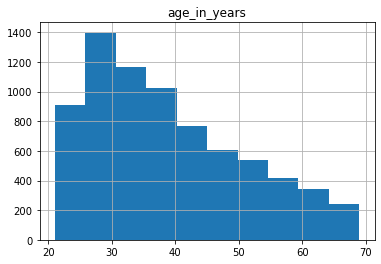

In [519]:
#visualizations 
#Distribution of ages that are in default
new = loan_no_outlier2[loan_no_outlier2['TARGET'] ==1]
new.hist(column = 'age_in_years')

In [520]:
#Rounding the age
loan_no_outlier2['new_age'] = loan_no_outlier2['age_in_years'].apply(np.ceil)

C:\Users\yaelr\AppData\Local\Temp/ipykernel_9388/2518692638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_no_outlier2['new_age'] = loan_no_outlier2['age_in_years'].apply(np.ceil)


<AxesSubplot:xlabel='new_age', ylabel='TARGET'>

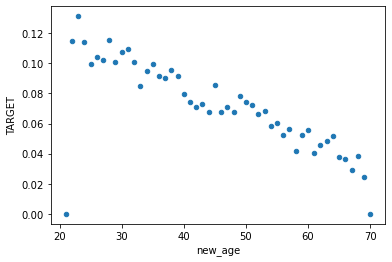

In [521]:
#Displays the default pattern between ages
meandf = loan_no_outlier2.groupby('new_age', as_index=False)['TARGET'].mean()
meandf.plot(kind='scatter', x = 'new_age', y = 'TARGET')

<AxesSubplot:xlabel='TARGET', ylabel='count'>

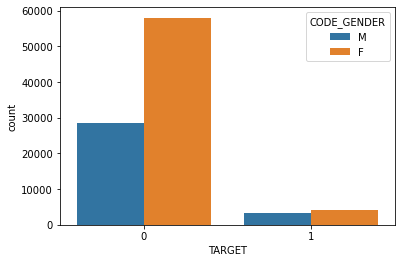

In [522]:
#How many are in default- Males vs. Females
sns.countplot(x ='TARGET', data = loan_no_outlier2, hue = 'CODE_GENDER')

In [523]:
#Creating a Linear Regression Model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#To Split our Data set into training and test data
from sklearn.model_selection import train_test_split
# To calculate accuracy measures and confusion matrix
from sklearn import metrics

In [524]:
#Looking again at the data
loan_no_outlier2.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,age_in_years,registration_by_years,new_age
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,Government,0,52.180822,11.671233,53.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,Business Entity Type 3,0,52.068493,26.939726,53.0
12,100016,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,...,0,0,0,0,0,Business Entity Type 2,0,36.819178,0.852055,37.0
15,100019,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,0,0,1,1,0,Business Entity Type 2,0,23.912329,9.572603,24.0
17,100021,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,270000.0,...,0,0,1,1,0,Construction,0,26.783562,11.350685,27.0
18,100022,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,157500.0,...,0,0,0,0,0,Housing,0,48.542466,23.975342,49.0
23,100027,Cash loans,F,N,Y,0,83250.0,239850.0,23850.0,225000.0,...,0,0,0,0,0,XNA,0,68.019178,24.690411,69.0
24,100029,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,247500.0,...,0,0,0,1,1,Business Entity Type 3,0,30.920548,0.295890,31.0
25,100030,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,...,0,0,0,0,0,Business Entity Type 3,0,52.969863,6.627397,53.0
27,100032,Cash loans,M,N,Y,1,112500.0,327024.0,23827.5,270000.0,...,0,0,0,1,1,Industry: type 11,0,43.693151,15.841096,44.0


In [525]:
#Dropping the value "XNA" 
loan_no_outlier2.drop(loan_no_outlier2.index[loan_no_outlier2['CODE_GENDER'] == 'XNA'], inplace = True)
loan_no_outlier2

C:\Users\yaelr\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,age_in_years,registration_by_years,new_age
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,Government,0,52.180822,11.671233,53.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,Business Entity Type 3,0,52.068493,26.939726,53.0
12,100016,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,...,0,0,0,0,0,Business Entity Type 2,0,36.819178,0.852055,37.0
15,100019,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,0,0,1,1,0,Business Entity Type 2,0,23.912329,9.572603,24.0
17,100021,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,270000.0,...,0,0,1,1,0,Construction,0,26.783562,11.350685,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456246,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,...,0,0,0,1,1,School,0,44.008219,23.758904,45.0
307504,456248,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,0,0,0,0,0,Self-employed,0,45.767123,26.843836,46.0
307505,456249,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,...,0,0,0,0,0,XNA,0,66.805479,20.189041,67.0
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0,Services,0,25.553425,23.167123,26.0


In [526]:
#Converting the categorical data to numerical
pd.get_dummies(loan_no_outlier2['CODE_GENDER'], drop_first = True)
loan_no_outlier2['CODE_GENDER'] = pd.get_dummies(loan_no_outlier2['CODE_GENDER'], drop_first = True)
loan_no_outlier2

C:\Users\yaelr\AppData\Local\Temp/ipykernel_9388/2598827331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_no_outlier2['CODE_GENDER'] = pd.get_dummies(loan_no_outlier2['CODE_GENDER'], drop_first = True)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,age_in_years,registration_by_years,new_age
2,100004,Revolving loans,1,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,Government,0,52.180822,11.671233,53.0
3,100006,Cash loans,0,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,Business Entity Type 3,0,52.068493,26.939726,53.0
12,100016,Cash loans,0,N,Y,0,67500.0,80865.0,5881.5,67500.0,...,0,0,0,0,0,Business Entity Type 2,0,36.819178,0.852055,37.0
15,100019,Cash loans,1,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,0,0,1,1,0,Business Entity Type 2,0,23.912329,9.572603,24.0
17,100021,Revolving loans,0,N,Y,1,81000.0,270000.0,13500.0,270000.0,...,0,0,1,1,0,Construction,0,26.783562,11.350685,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456246,Cash loans,0,N,Y,1,94500.0,225000.0,10620.0,225000.0,...,0,0,0,1,1,School,0,44.008219,23.758904,45.0
307504,456248,Cash loans,0,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,0,0,0,0,0,Self-employed,0,45.767123,26.843836,46.0
307505,456249,Cash loans,0,N,Y,0,112500.0,225000.0,22050.0,225000.0,...,0,0,0,0,0,XNA,0,66.805479,20.189041,67.0
307506,456251,Cash loans,1,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0,Services,0,25.553425,23.167123,26.0


In [527]:
#Removing all the unecessary columns besides those that we need
loan_no_outlier2.drop(loan_no_outlier2.columns.difference(['CODE_GENDER','TARGET', 'new_age']), 1, inplace=True)
loan_no_outlier2

C:\Users\yaelr\AppData\Local\Temp/ipykernel_9388/3549316540.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  loan_no_outlier2.drop(loan_no_outlier2.columns.difference(['CODE_GENDER','TARGET', 'new_age']), 1, inplace=True)
C:\Users\yaelr\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,CODE_GENDER,TARGET,new_age
2,1,0,53.0
3,0,0,53.0
12,0,0,37.0
15,1,0,24.0
17,0,0,27.0
...,...,...,...
307502,0,0,45.0
307504,0,0,46.0
307505,0,0,67.0
307506,1,0,26.0


In [528]:
#Defining X
X = loan_no_outlier2[['CODE_GENDER', 'new_age']]
X

,CODE_GENDER,new_age
2,1,53.0
3,0,53.0
12,0,37.0
15,1,24.0
17,0,27.0
...,...,...
307502,0,45.0
307504,0,46.0
307505,0,67.0
307506,1,26.0


In [529]:
#Defining y
y = loan_no_outlier2[['TARGET']]
y

,TARGET
2,0
3,0
12,0
15,0
17,0
...,...
307502,0
307504,0
307505,0
307506,0


In [530]:
#Fitting the regression model
lr = LogisticRegression()
lr.fit(X, y)

C:\Users\yaelr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [531]:
#Showing the score
lr.score(X,y)

0.9212521398875031

In [532]:
#Showing the Confusion Matrix
pred_test = lr.predict(X)
confusion_matrix = pd.DataFrame(
    metrics.confusion_matrix(y,pred_test),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(confusion_matrix)

            pred:yes  pred:no
actual:yes     86641        0
actual:no       7406        0
